In [1]:
# Import dependencies. 

import pandas as pd
# import requests
# import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Import the API key
# from config_br import geoapify_key

In [2]:
# Read in the sample Miami dataset that includes our API calls for zip codes, school count, hospital count, restaurant count.

miami_all_sample = pd.read_csv("TESTING_Miami_merge.csv")
miami_all_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           950 non-null    float64
 1   LONGITUDE          950 non-null    float64
 2   PARCELNO           950 non-null    int64  
 3   SALE_PRC           950 non-null    float64
 4   LND_SQFOOT         950 non-null    int64  
 5   TOT_LVG_AREA       950 non-null    int64  
 6   SPEC_FEAT_VAL      950 non-null    int64  
 7   RAIL_DIST          950 non-null    float64
 8   OCEAN_DIST         950 non-null    float64
 9   WATER_DIST         950 non-null    float64
 10  CNTR_DIST          950 non-null    float64
 11  SUBCNTR_DI         950 non-null    float64
 12  HWY_DIST           950 non-null    float64
 13  age                950 non-null    int64  
 14  avno60plus         950 non-null    int64  
 15  month_sold         950 non-null    int64  
 16  structure_quality  950 non

In [3]:
miami_all_sample.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,47379.1,22018.5,22,0,3,4,33196,2,1,0
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,26516.6,10578.8,21,0,8,4,33138,6,6,10
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,59032.3,3600.5,17,0,6,4,33032,0,0,0
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,47818.3,1899.8,19,0,4,5,33178,2,0,0
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,47633.0,10676.0,21,0,12,4,33162,7,3,0


## Sale price vs. Schools

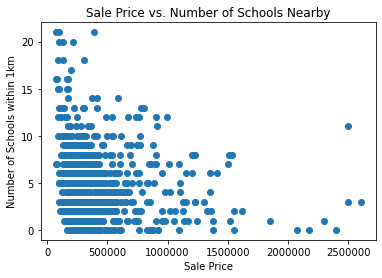

In [4]:
# Plot sale price vs. number of schools

x = miami_all_sample["SALE_PRC"]
y = miami_all_sample["school count"]

plt.scatter(x, y)
plt.xlabel("Sale Price")
plt.ylabel("Number of Schools within 1km")
plt.title("Sale Price vs. Number of Schools Nearby")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.show()

# to save the plot, will use plt.savefig("name.png")

The correlation between sale price and the number of schools within 1km is -0.1


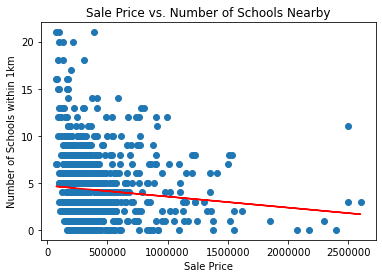

In [5]:
# correlation and linear regression

x = miami_all_sample["SALE_PRC"]
y = miami_all_sample["school count"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.xlabel("Sale Price")
plt.ylabel("Number of Schools within 1km")
plt.title("Sale Price vs. Number of Schools Nearby")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
correlation = st.pearsonr(x,y)
correlation = round(correlation[0],2)
print(f"The correlation between sale price and the number of schools within 1km is {correlation}")
plt.show()

## Sale price vs. Hospitals

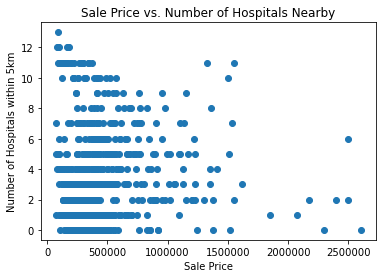

In [6]:
# Plot sale price vs. number of hospitals

x = miami_all_sample["SALE_PRC"]
y = miami_all_sample["hosp count"]

plt.scatter(x, y)
plt.xlabel("Sale Price")
plt.ylabel("Number of Hospitals within 5km")
plt.title("Sale Price vs. Number of Hospitals Nearby")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.show()

The correlation between sale price and the number of hospitals within 5km is 0.11


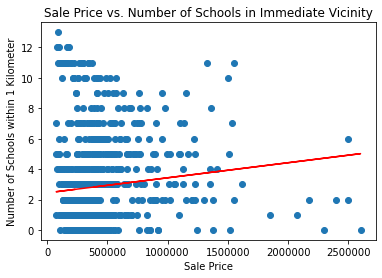

In [7]:
# correlation and linear regression

x = miami_all_sample["SALE_PRC"]
y = miami_all_sample["hosp count"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.xlabel("Sale Price")
plt.ylabel("Number of Schools within 1 Kilometer")
plt.title("Sale Price vs. Number of Schools in Immediate Vicinity")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
correlation = st.pearsonr(x,y)
correlation = round(correlation[0],2)
print(f"The correlation between sale price and the number of hospitals within 5km is {correlation}")
plt.show()

## Sale price vs. Restaurants

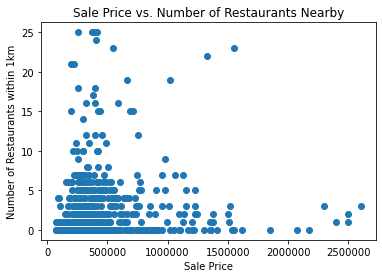

In [8]:
# Plot sale price vs. number of restaurants

x = miami_all_sample["SALE_PRC"]
y = miami_all_sample["rest count"]

plt.scatter(x, y)
plt.xlabel("Sale Price")
plt.ylabel("Number of Restaurants within 1km")
plt.title("Sale Price vs. Number of Restaurants Nearby")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.show()

The correlation between sale price and the number of restaurants within 1KM is 0.12


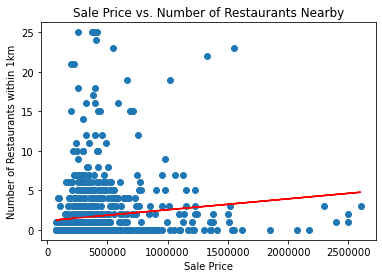

In [9]:
# correlation and linear regression

x = miami_all_sample["SALE_PRC"]
y = miami_all_sample["rest count"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.xlabel("Sale Price")
plt.ylabel("Number of Restaurants within 1km")
plt.title("Sale Price vs. Number of Restaurants Nearby")
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
correlation = st.pearsonr(x,y)
correlation = round(correlation[0],2)
print(f"The correlation between sale price and the number of restaurants within 1KM is {correlation}")
plt.show()